In [5]:
# 주성분 분석용 패키지
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

from pandas import read_excel, DataFrame

from matplotlib import pyplot as plt
import seaborn as sb

import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols

In [6]:
df = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


데이터 전처리

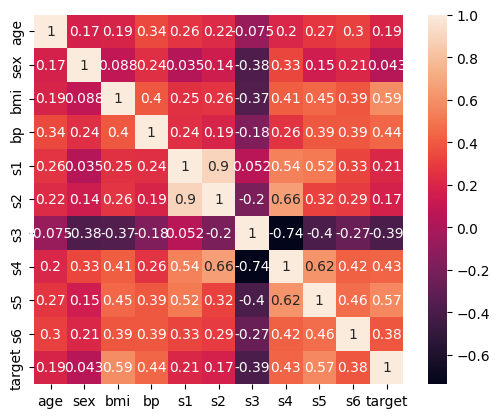

In [7]:
sb.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

In [8]:
df1 = df.drop("target", axis=1)
df1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [9]:
model = PCA(n_components=5)
fit = model.fit_transform(df1)
fit

array([[ 0.02793021, -0.09260136,  0.02802565, -0.00393914, -0.01220903],
       [-0.13468668,  0.06526327,  0.00132849, -0.02235602, -0.00681463],
       [ 0.01294384, -0.07776432,  0.03516224, -0.03764745, -0.05535967],
       ...,
       [-0.00976067, -0.05733918,  0.02360117, -0.06437324, -0.00673399],
       [ 0.03295652,  0.00999473, -0.04132099,  0.07690302,  0.00568996],
       [-0.09056122,  0.18910841, -0.0022992 , -0.01049425,  0.02853671]])

In [10]:
pca_df = DataFrame(fit)
pca_df

,0,1,2,3,4
0,0.027930,-0.092601,0.028026,-0.003939,-0.012209
1,-0.134687,0.065263,0.001328,-0.022356,-0.006815
2,0.012944,-0.077764,0.035162,-0.037647,-0.055360
3,0.002344,0.018183,-0.095750,0.065317,0.012156
4,-0.035979,0.038621,-0.002723,-0.006540,-0.006345
...,...,...,...,...,...
437,0.058958,-0.049276,0.044173,-0.031215,0.009717
438,0.060157,0.036212,-0.083248,-0.053913,-0.004470
439,-0.009761,-0.057339,0.023601,-0.064373,-0.006734
440,0.032957,0.009995,-0.041321,0.076903,0.005690


In [11]:
# 주성분 분석의 대상 컬럼 수를 독립변수의 전체 컬럼의 길이로 설정
model = pca(n_components=len(df1.columns))
# 표준화 결과를 활용하여 주성분 분석 수행
fit = model.fit_transform(df1)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':            age       sex       bmi        bp        s1        s2        s3  \
 PC1   0.216431  0.186967  0.303162  0.271738  0.343255  0.351861 -0.282437   
 PC2   0.044367 -0.386547 -0.156281 -0.138266  0.573027  0.455942  0.506239   
 PC3   0.494668 -0.106864  0.167527  0.513571 -0.068579 -0.269689  0.386032   
 PC4  -0.414012 -0.679860  0.499825 -0.019662 -0.068396 -0.167774 -0.076020   
 PC5  -0.686876  0.373464  0.129333  0.486874  0.129180  0.116722  0.245001   
 PC6  -0.225815  0.041705 -0.403151 -0.272783  0.005398 -0.133262  0.106354   
 PC7  -0.109530 -0.067622 -0.519874  0.320655  0.073644 -0.230535 -0.007548   
 PC8   0.014937  0.442933  0.392922 -0.477360  0.129411 -0.191325  0.324635   
 PC9   0.008100 -0.002106  0.042377  0.027194 -0.042038 -0.359316  0.481247   
 PC10  0.003263  0.003660  0.008247 -0.003222  0.709775 -0.563195 -0.317445   
 
             s4        s5        s6  
 PC1   0.428834  0.378618  0.322183  
 PC2  -0.068181 -0.026187 -0.084949  
 PC

In [12]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,s4,0.428834,best
1,PC2,s1,0.573027,best
2,PC3,bp,0.513571,best
3,PC4,sex,-0.679860,best
4,PC5,age,-0.686876,best
5,PC6,s6,0.805066,best
6,PC7,s5,0.647302,best
7,PC8,bp,-0.477360,best
8,PC9,s4,0.773817,best
9,PC10,s1,0.709775,best


In [13]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature

['bp', 's5', 's6', 's1', 's4', 'age', 'sex']

In [14]:
ols = my_ols(df, 'target', feature)
ols.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     48.44
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.06e-50
Time:                        14:13:13   Log-Likelihood:                -2419.6
No. Observations:                 442   AIC:                             4855.
Df Residuals:                     434   BIC:                             4888.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.770     54.932      0.000     146.690     157.577
bp           456.9719     68.115      6.709      0.000     323.095     590.849
s5           642.7408     82.452      7.795      0.000     480.686     804.795
s6           150.1445     70.100      2.142      0.033      12.366     287.923
s1          -358.8123     74.225     -4.834      0.000    -504.698    -212.927
s4           412.2661     84.704      4.867      0.000     245.785     578.747
age           -8.6419     64.182     -0.135      0.893    -134.789     117.505
sex         -290.7876     64.800     -4.487      0.000    -418.148    -163.427
==============================================================================
Omnibus:                        2.903   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.906
Skew:                           0.162   Prob(JB):                        0.234
Kurtosis:                       2.771   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
ols.table

B    표준오차  β        t   유의확률        VIF
종속변수   독립변수                                                 
target bp     456.9719  68.115  0   6.709*  0.000   1.468583
       s5     642.7408  82.452  0   7.795*  0.000  10.125073
       s6     150.1445  70.100  0   2.142*  0.033   1.485021
       s1    -358.8123  74.225  0  -4.834*  0.000  59.257108
       s4     412.2661  84.704  0   4.867*  0.000   8.893714
       age     -8.6419  64.182  0  -0.135*  0.893   1.217315
       sex   -290.7876  64.800  0  -4.487*  0.000   1.283075

In [16]:
target = df["target"]
target

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: target, Length: 442, dtype: int64

In [17]:
pred_target = ols.fit.predict(df.filter(feature))
pred_target

0      172.007474
1       82.086360
2      147.306696
3      172.080542
4      145.020055
          ...    
437    186.443274
438     98.010573
439    125.962704
440    195.884545
441     79.722162
Length: 442, dtype: float64

In [18]:
result_df = DataFrame({
    "실제":target,
    "예측":pred_target
})
result_df

,실제,예측
0,151,172.007474
1,75,82.086360
2,141,147.306696
3,206,172.080542
4,135,145.020055
...,...,...
437,178,186.443274
438,104,98.010573
439,132,125.962704
440,220,195.884545


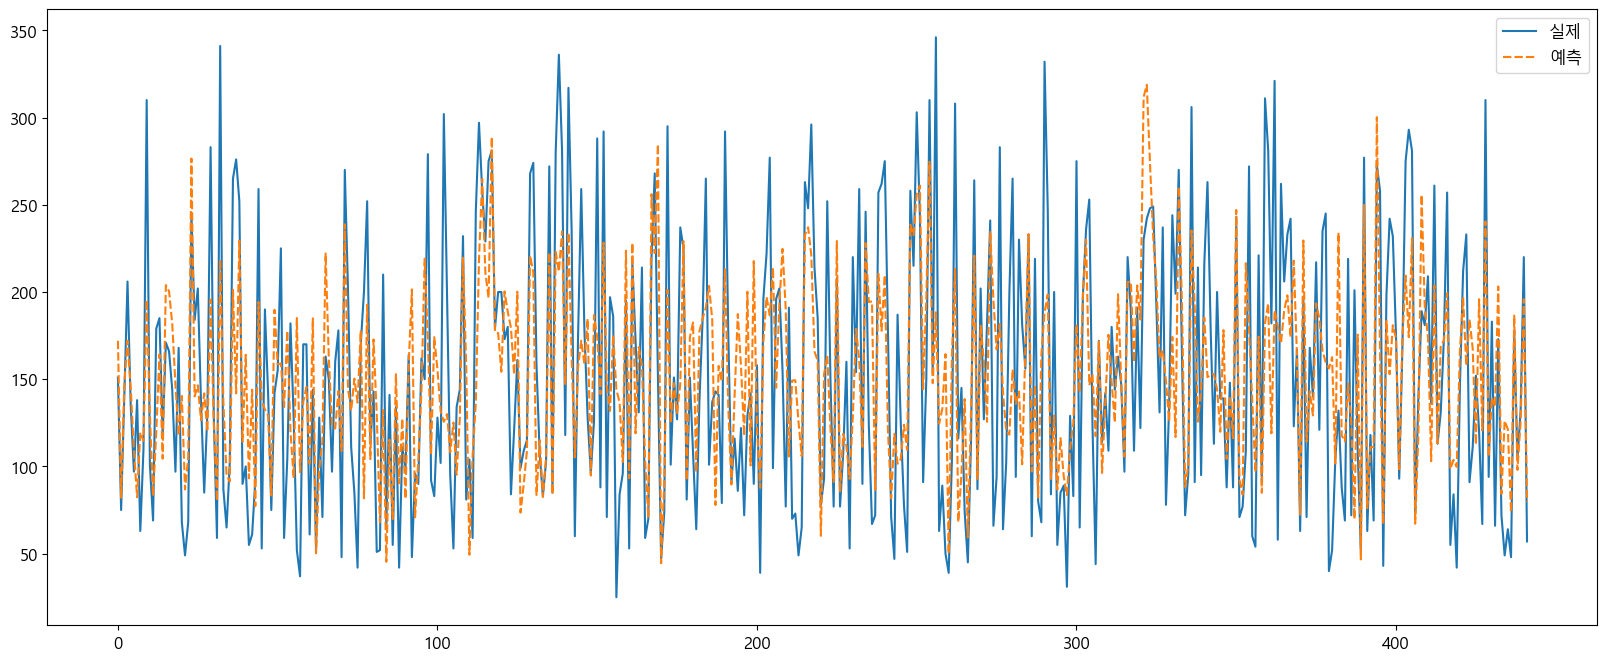

In [19]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["axes.unicode_minus"] = False

sb.lineplot(data=result_df.filter(['실제', '예측']))
plt.show()
plt.close()

In [28]:
df = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
df

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [29]:
x_train = df.drop(columns=['rent','neighborhood','borough'])
print(x_train)

      bedrooms  bathrooms  size_sqft  min_to_subway  floor  building_age_yrs  \
0          0.0          1        480              9    2.0                17   
1          2.0          2       2000              4    1.0                96   
2          1.0          1        916              2   51.0                29   
3          1.0          1        975              3    8.0                31   
4          2.0          2       4800              3    4.0               136   
...        ...        ...        ...            ...    ...               ...   
3534       1.0          1        532              3    8.0                16   
3535       2.0          2        988              5   10.0                 9   
3536       0.0          1        250              2    5.0                96   
3537       1.0          1        651              6    5.0                14   
3538       1.0          1        816              4   11.0                 9   

      no_fee  has_roofdeck  has_washer_

In [30]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_train_std

array([[-1.39741035, -0.61179008, -0.96201105, ...,  2.09442254,
        -0.24148167,  2.17193139],
       [ 0.66986323,  1.05625699,  2.2186935 , ..., -0.47745857,
        -0.24148167, -0.4604197 ],
       [-0.36377356, -0.61179008, -0.04965106, ...,  2.09442254,
        -0.24148167, -0.4604197 ],
       ...,
       [-1.39741035, -0.61179008, -1.44330187, ..., -0.47745857,
        -0.24148167, -0.4604197 ],
       [-0.36377356, -0.61179008, -0.60418179, ...,  2.09442254,
        -0.24148167,  2.17193139],
       [-0.36377356, -0.61179008, -0.25890794, ..., -0.47745857,
         4.14110106,  2.17193139]])

In [31]:
std_df = DataFrame(x_train_std, columns=x_train.columns)
std_df.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,-1.397410,-0.611790,-0.962011,0.730862,-0.904097,-0.888763,1.21585,2.336243,-0.436784,-0.625393,1.546964,2.094423,-0.241482,2.171931
1,0.669863,1.056257,2.218694,-0.176116,-0.995343,1.117593,-0.82247,-0.428038,-0.436784,-0.625393,-0.646428,-0.477459,-0.241482,-0.460420
2,-0.363774,-0.611790,-0.049651,-0.538908,3.566974,-0.584000,-0.82247,2.336243,-0.436784,1.598995,1.546964,2.094423,-0.241482,-0.460420
3,-0.363774,-0.611790,0.073811,-0.357512,-0.356619,-0.533206,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931
4,0.669863,1.056257,8.077886,-0.357512,-0.721604,2.133470,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931


In [32]:
# 주성분 분석 객체 생성(n_components : 주성분 개수)
model = PCA(n_components=5)
fit = model.fit_transform(std_df)
fit

array([[ 2.40928812, -2.18069   ,  0.91132234, -0.44417636,  1.54698378],
       [-0.96942204,  2.34303506, -1.81494261, -0.09746262,  0.08769817],
       [ 2.92849966, -0.61453548,  1.65728607, -0.71576097, -1.74355635],
       ...,
       [-1.51613514, -1.84337353, -1.3597695 , -0.04660394, -0.33045575],
       [ 3.29310146, -1.51414195,  0.78346638,  0.53756405,  1.79096538],
       [ 4.43316573, -1.22380276,  0.51557563,  2.29425249, -1.77351966]])

In [33]:
pca_df = DataFrame(fit)
pca_df

,0,1,2,3,4
0,2.409288,-2.180690,0.911322,-0.444176,1.546984
1,-0.969422,2.343035,-1.814943,-0.097463,0.087698
2,2.928500,-0.614535,1.657286,-0.715761,-1.743556
3,2.726596,-0.909429,-0.398662,-0.660747,-0.037060
4,3.466456,5.087077,-2.887895,-0.654679,0.255830
...,...,...,...,...,...
3534,4.355565,-1.850165,0.726286,0.151283,1.271981
3535,4.653632,0.265098,0.953768,0.102435,1.448066
3536,-1.516135,-1.843374,-1.359769,-0.046604,-0.330456
3537,3.293101,-1.514142,0.783466,0.537564,1.790965


In [34]:
# 주성분 분석의 대상 컬럼 수를 독립변수의 전체 컬럼의 길이로 설정
model = pca(n_components=len(std_df.columns))
# 표준화 결과를 활용하여 주성분 분석 수행
fit = model.fit_transform(std_df)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[14]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':       bedrooms  bathrooms  size_sqft  min_to_subway     floor  \
 PC1   0.054996   0.080544   0.088606       0.000835  0.071535   
 PC2   0.556271   0.564578   0.573482       0.080036  0.094318   
 PC3  -0.084116   0.029651  -0.068881       0.326896  0.540002   
 PC4  -0.018845   0.010746  -0.006296      -0.077599 -0.058588   
 PC5   0.054219   0.002141  -0.020127       0.624977 -0.409512   
 PC6  -0.029586  -0.054658  -0.060670       0.672089 -0.089280   
 PC7   0.093610   0.074324   0.019190      -0.047965 -0.374251   
 PC8   0.028525  -0.092129   0.012539       0.167188  0.546436   
 PC9   0.005665  -0.007801  -0.027443       0.009799 -0.048982   
 PC10  0.023980   0.029227  -0.011537      -0.079192 -0.259192   
 PC11 -0.038277   0.023753  -0.010185       0.006250  0.049702   
 PC12  0.285562  -0.260103  -0.034502      -0.014834  0.047007   
 PC13 -0.726891   0.521171   0.191647       0.027472 -0.015266   
 PC14 -0.233939  -0.562151   0.784195       0.027895 -0.046175  

In [35]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,has_elevator,0.453207,best
1,PC2,size_sqft,0.573482,best
2,PC3,building_age_yrs,-0.638744,best
3,PC4,has_patio,0.743626,best
4,PC5,min_to_subway,0.624977,best
5,PC6,min_to_subway,0.672089,best
6,PC7,no_fee,0.666304,best
7,PC8,building_age_yrs,0.673353,best
8,PC9,has_roofdeck,0.801673,best
9,PC10,has_dishwasher,-0.650467,best


In [36]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature

['has_elevator',
 'size_sqft',
 'bedrooms',
 'has_dishwasher',
 'has_roofdeck',
 'has_patio',
 'no_fee',
 'has_gym',
 'min_to_subway',
 'building_age_yrs']

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rent              3539 non-null   int64  
 1   bedrooms          3539 non-null   float64
 2   bathrooms         3539 non-null   int64  
 3   size_sqft         3539 non-null   int64  
 4   min_to_subway     3539 non-null   int64  
 5   floor             3539 non-null   float64
 6   building_age_yrs  3539 non-null   int64  
 7   no_fee            3539 non-null   int64  
 8   has_roofdeck      3539 non-null   int64  
 9   has_washer_dryer  3539 non-null   int64  
 10  has_doorman       3539 non-null   int64  
 11  has_elevator      3539 non-null   int64  
 12  has_dishwasher    3539 non-null   int64  
 13  has_patio         3539 non-null   int64  
 14  has_gym           3539 non-null   int64  
 15  neighborhood      3539 non-null   object 
 16  borough           3539 non-null   object 


In [40]:
df = df.drop(['neighborhood','borough'], axis=1)
df.astype(float)

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550.0,0.0,1.0,480.0,9.0,2.0,17.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,11500.0,2.0,2.0,2000.0,4.0,1.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4500.0,1.0,1.0,916.0,2.0,51.0,29.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,4795.0,1.0,1.0,975.0,3.0,8.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,17500.0,2.0,2.0,4800.0,3.0,4.0,136.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210.0,1.0,1.0,532.0,3.0,8.0,16.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3535,6675.0,2.0,2.0,988.0,5.0,10.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3536,1699.0,0.0,1.0,250.0,2.0,5.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3537,3475.0,1.0,1.0,651.0,6.0,5.0,14.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [41]:
ols = my_ols(df, 'rent', feature)
ols.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1103.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -31034.
No. Observations:                3539   AIC:                         6.209e+04
Df Residuals:                    3528   BIC:                         6.216e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          464.9747     85.604      5.432      0.000     297.136     632.813
has_elevator        15.7959     80.499      0.196      0.844    -142.034     173.626
size_sqft            5.9175      0.087     68.046      0.000       5.747       6.088
bedrooms          -147.3607     42.834     -3.440      0.001    -231.344     -63.378
has_dishwasher      -0.9604     75.520     -0.013      0.990    -149.027     147.106
has_roofdeck        39.6111     91.100      0.435      0.664    -139.002     218.224
has_patio           17.2065    116.720      0.147      0.883    -211.639     246.051
no_fee             -59.3843     56.323     -1.054      0.292    -169.813      51.044
has_gym             -1.5627     96.309     -0.016      0.987    -190.390     187.265
min_to_subway      -13.0821      4.865     -2.689      0.007     -22.621      -3.543
building_age_yrs   -11.7301      0.699    -16.793      0.000     -13.100     -10.361
==============================================================================
Omnibus:                      877.906   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11732.204
Skew:                           0.800   Prob(JB):                         0.00
Kurtosis:                      11.775   Cond. No.                     4.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
ols.table

B     표준오차  β         t   유의확률        VIF
종속변수 독립변수                                                               
rent has_elevator        15.7959   80.499  0    0.196*  0.844   3.586617
     size_sqft            5.9175    0.087  0   68.046*  0.000  29.997252
     bedrooms          -147.3607   42.834  0   -3.440*  0.001   7.905733
     has_dishwasher      -0.9604   75.520  0   -0.013*  0.990   1.731063
     has_roofdeck        39.6111   91.100  0    0.435*  0.664   1.894040
     has_patio           17.2065  116.720  0    0.147*  0.883   1.102366
     no_fee             -59.3843   56.323  0   -1.054*  0.292   1.640580
     has_gym             -1.5627   96.309  0   -0.016*  0.987   2.572165
     min_to_subway      -13.0821    4.865  0   -2.689*  0.007   1.789693
     building_age_yrs   -11.7301    0.699  0  -16.793*  0.000   2.334718

In [43]:
예측 = ols.fit.predict(df.filter(feature))
예측

0        2981.704638
1       10826.756383
2        5426.116935
3        5697.531057
4       26952.794379
            ...     
3534     3232.274448
3535     5839.221539
3536      792.088152
3537     3881.054911
3538     5059.412569
Length: 3539, dtype: float64

In [44]:
실제 = df["rent"]
실제

0        2550
1       11500
2        4500
3        4795
4       17500
        ...  
3534     4210
3535     6675
3536     1699
3537     3475
3538     4500
Name: rent, Length: 3539, dtype: int64

In [45]:
result_df = DataFrame({
    "실제":실제,
    "예측":예측
})
result_df

,실제,예측
0,2550,2981.704638
1,11500,10826.756383
2,4500,5426.116935
3,4795,5697.531057
4,17500,26952.794379
...,...,...
3534,4210,3232.274448
3535,6675,5839.221539
3536,1699,792.088152
3537,3475,3881.054911


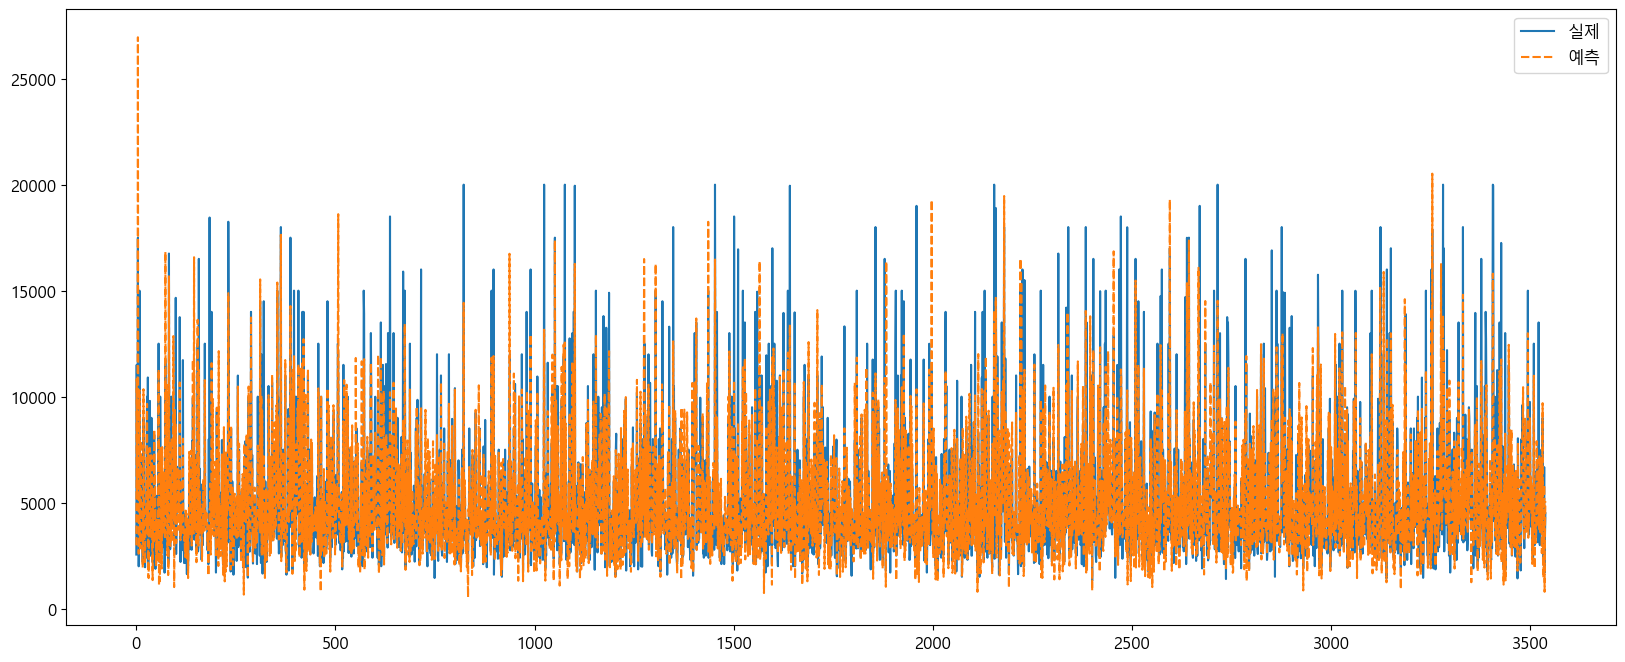

In [46]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["axes.unicode_minus"] = False

sb.lineplot(data=result_df.filter(['실제', '예측']))
plt.show()
plt.close()